### **1. Calculate glacier elevation change in the specific period**

In [1]:
import os
root_proj = '/Users/luo/OneDrive/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from utils.raster_vec import vec2mask
from utils.geotif_io import readTiff
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
path_rgi60_wkunlun='data/rgi60-wkunlun/rgi60_1305_selected.gpkg'
### --- 1.Hugonnet2021 data
path_dhdt_hugonnet_2000_2019='data/dhdt-release/Hugonnet2021/13_14_15_rgi60_2000-01-01_2020-01-01/dhdt/dhdt_2000_2020_subs.tif'
# path_dhdt_err_hugonnet_2000_2019='data/publishment/Hugonnet2021/13_14_15_rgi60_2000-01-01_2020-01-01/dhdt_err/dhdt_err_2000_2020_subs.tif'
### --- 2.Shean2020 data
path_dhdt_shean_2000_2018='data/dhdt-release/Shean2020/shean_hma_glacier_ASTER_WV_2000-2018_dhdt_subs.tif'
### --- 3.Guan2021 data
path_dhdt_guan_2000_2016='data/dhdt-release/Guan2021/2000_2016_dh_rate_subs.tif'
### --- 4.Brun2017 data
path_dhdt_brun_2000_2016='data/dhdt-release/Brun2017/dh_dt_2000-2016_ASTER_mosaic_subs.tif'
path_dhdt_err_brun_2000_2016='data/dhdt-release/Brun2017/dh_dt_err_2000-2016_ASTER_mosaic_subs.tif'


### Read in dhdt map

In [47]:
dhdt_hugonnet_2000_2019,dhdt_hugonnet_2000_2019_info=readTiff(path_dhdt_hugonnet_2000_2019)
dhdt_shean_2000_2018, dhdt_shean_2000_2018_info=readTiff(path_dhdt_shean_2000_2018)
dhdt_guan_2000_2016, dhdt_guan_2000_2016_info=readTiff(path_dhdt_guan_2000_2016)
dhdt_brun_2000_2016, dhdt_brun_2000_2016_info=readTiff(path_dhdt_brun_2000_2016)
## Error map 
# dhdt_err_hugonnet_2000_2019, dhdt_err_hugonnet_2000_2019_info=readTiff(path_dhdt_err_hugonnet_2000_2019)
# dhdt_err_brun_2000_2016, dhdt_err_brun_2000_2016_info=readTiff(path_dhdt_err_brun_2000_2016)


### Remove outlier values

In [59]:
dhdt_hugonnet_2000_2019_ = np.where((dhdt_hugonnet_2000_2019<5) & (dhdt_hugonnet_2000_2019>-5), dhdt_hugonnet_2000_2019, np.nan)
dhdt_shean_2000_2018_ = np.where((dhdt_shean_2000_2018<5) & (dhdt_shean_2000_2018>-5), dhdt_shean_2000_2018, np.nan) 
dhdt_guan_2000_2016_ = np.where((dhdt_guan_2000_2016<5) & (dhdt_guan_2000_2016>-5), dhdt_guan_2000_2016, np.nan) 
dhdt_brun_2000_2016_ = np.where((dhdt_brun_2000_2016<5) & (dhdt_brun_2000_2016>-5), dhdt_brun_2000_2016, np.nan) 


### Generate mask image for non-glacier region.

In [73]:
rgi60_mask_hugonnet = vec2mask(path_vec=path_rgi60_wkunlun, path_raster=path_dhdt_hugonnet_2000_2019)
rgi60_mask_shean = vec2mask(path_vec=path_rgi60_wkunlun, path_raster=path_dhdt_shean_2000_2018)
rgi60_mask_guan = vec2mask(path_vec=path_rgi60_wkunlun, path_raster=path_dhdt_guan_2000_2016)
rgi60_mask_brun = vec2mask(path_vec=path_rgi60_wkunlun, path_raster=path_dhdt_brun_2000_2016)
dhdt_hugonnet_2000_2019_glacier = np.where(rgi60_mask_hugonnet==1,dhdt_hugonnet_2000_2019_, np.nan)
dhdt_shean_2000_2018_glacier = np.where(rgi60_mask_shean==1, dhdt_shean_2000_2018_, np.nan)
dhdt_guan_2000_2016_glacier = np.where(rgi60_mask_guan==1, dhdt_guan_2000_2016_, np.nan)
dhdt_brun_2000_2016_glacier = np.where(rgi60_mask_brun==1, dhdt_brun_2000_2016_, np.nan)


Text(0.5, 1.0, 'after glacier masking')

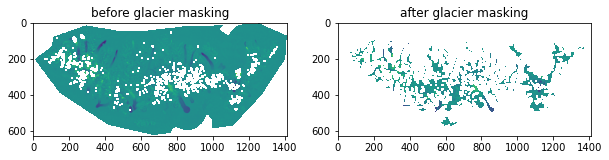

In [80]:
plt.figure(figsize=(10,5)); 
plt.subplot(1,2,1); plt.imshow(dhdt_hugonnet_2000_2019_)
plt.title('before glacier masking')
plt.subplot(1,2,2); plt.imshow(dhdt_hugonnet_2000_2019_glacier)
plt.title('after glacier masking')


### Calculate the mean and median value of the dhdt.

In [77]:
### -- mean value
print('mean value:')
print('dhdt_hugonnet_2000_2019: ', np.nanmean(dhdt_hugonnet_2000_2019_glacier));
print('dhdt_shean_2000_2018: ',np.nanmean(dhdt_shean_2000_2018_glacier));
print('dhdt_guan_2000_2016: ',np.nanmean(dhdt_guan_2000_2016_glacier));
print('dhdt_brun_2000_2016: ',np.nanmean(dhdt_brun_2000_2016_glacier));
### -- median value
print('median value:')
print('dhdt_hugonnet_2000_2019: ', np.nanmedian(dhdt_hugonnet_2000_2019_glacier));
print('dhdt_shean_2000_2018: ',np.nanmedian(dhdt_shean_2000_2018_glacier));
print('dhdt_guan_2000_2016: ',np.nanmedian(dhdt_guan_2000_2016_glacier));
print('dhdt_brun_2000_2016: ',np.nanmedian(dhdt_brun_2000_2016_glacier));


mean value:
dhdt_hugonnet_2000_2019:  -0.02301614
dhdt_shean_2000_2018:  -0.1361213
dhdt_guan_2000_2016:  0.029186783
dhdt_brun_2000_2016:  0.049186587
median value:
dhdt_hugonnet_2000_2019:  0.024536133
dhdt_shean_2000_2018:  -0.06374028
dhdt_guan_2000_2016:  0.114384204
dhdt_brun_2000_2016:  0.056523472


### Visualize the dhdt map

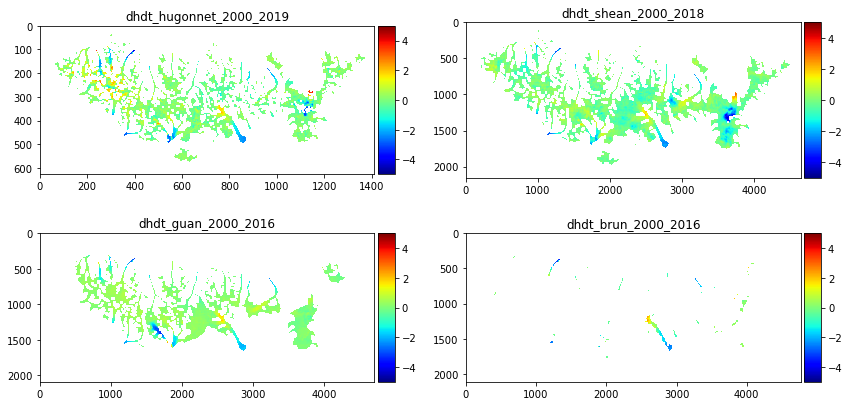

In [79]:
### --- 2000-2019 (hugonnet2021 data)
plt.figure(figsize=(14, 7))
ax1 = plt.subplot(2,2,1); 
im1 = plt.imshow(dhdt_hugonnet_2000_2019_glacier, vmax=5, vmin=-5, cmap='jet'); 
plt.title('dhdt_hugonnet_2000_2019')
divider = make_axes_locatable(ax1); cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

### --- 2000-2018 (shean2020 data)
ax1 = plt.subplot(2,2,2); 
im1 = plt.imshow(dhdt_shean_2000_2018_glacier, vmax=5, vmin=-5, cmap='jet'); 
plt.title('dhdt_shean_2000_2018')
divider = make_axes_locatable(ax1); cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

### --- 2000-2016 (guan2021 data)
ax1 = plt.subplot(2,2,3); 
im1 = plt.imshow(dhdt_guan_2000_2016_glacier, vmax=5, vmin=-5, cmap='jet'); 
plt.title('dhdt_guan_2000_2016')
divider = make_axes_locatable(ax1); cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)

### --- 2000-2016 (brun2017 data)
ax1 = plt.subplot(2,2,4); 
im1 = plt.imshow(dhdt_brun_2000_2016_glacier, vmax=5, vmin=-5, cmap='jet'); 
plt.title('dhdt_brun_2000_2016')
divider = make_axes_locatable(ax1); cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im1, cax=cax)
